In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#gathering Data
data_order=pd.read_csv("/content/olist_orders_dataset.csv")
data_order_item=pd.read_csv("/content/olist_order_items_dataset.csv")

In [3]:
#Data wrangling
def data_summary(data_frame) :
  print("##################### statistics summary #####################")
  print(data_frame.describe())
  print("##################### Data Type #####################")
  print(data_frame.info())
  print("##################### Missing Value #####################")
  print(data_frame.isnull().sum())
  print("##################### Duplicated Data #####################")
  print(data_frame.duplicated().sum())
  print("##################### Quantiles #####################")
  print(data_frame.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
#Data order
data_summary(data_order)

##################### statistics summary #####################
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95

<ipython-input-3-edabd56c6de7>:12: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data_frame.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [5]:
#Data Order Item
data_summary(data_order_item)

##################### statistics summary #####################
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000
##################### Data Type #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shi

<ipython-input-3-edabd56c6de7>:12: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data_frame.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [6]:
data_order=data_order.drop(["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"], axis=1)

In [7]:
data_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [49]:
#merge kedua data
data_merge= pd.merge(
    left=data_order_item,
    right=data_order,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
data_merge.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51


In [79]:
#data["total_price"]=data["quantity"]*data["price"]
data_rfm=data_merge.groupby(by="customer_id", as_index=False).agg({
    "order_id" : "count",
    "price" : "sum",
    "order_purchase_timestamp" : "max"
})
data_rfm.columns=["customer_id","frequency", "monetary", "date_max"]
data_rfm.head()

,customer_id,frequency,monetary,date_max
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,2017-11-14 16:08:26
1,000161a058600d5901f007fab4c27140,1,54.90,2017-07-16 09:40:32
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,2017-02-28 11:06:43
3,0002414f95344307404f0ace7a26f1d5,1,149.90,2017-08-16 13:09:20
4,000379cdec625522490c315e70c7a9fb,1,93.00,2018-04-02 13:42:17


In [83]:
data_rfm["recency"] = pd.to_datetime(data_rfm["date_max"]).dt.date
recent_date = pd.to_datetime(data_rfm["recency"]).dt.date.max()
data_rfm["recency"] = data_rfm["recency"].apply(lambda x: (recent_date - x).days)
data_rfm.head()

,customer_id,frequency,monetary,date_max,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,2017-11-14 16:08:26,293
1,000161a058600d5901f007fab4c27140,1,54.90,2017-07-16 09:40:32,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,2017-02-28 11:06:43,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,2017-08-16 13:09:20,383
4,000379cdec625522490c315e70c7a9fb,1,93.00,2018-04-02 13:42:17,154


In [84]:
new_cols = ["customer_id","recency","frequency", "monetary", "date_max"]
data_rfm=data_rfm.reindex(columns=new_cols)

In [87]:
data_rfm=data_rfm.drop("date_max", axis=1)

In [108]:
#data_rfm=data_rfm[(data_rfm["frequency"]>2)]

In [111]:
data_summary(data_rfm)

##################### statistics summary #####################
           recency    frequency      monetary  r_rank_norm  f_rank_norm  \
count  2287.000000  2287.000000   2287.000000  2287.000000  2287.000000   
mean    242.356799     3.828159    301.636651    50.470136    98.840520   
std     149.482152     1.445944    465.167260    28.113770     0.598148   
min       5.000000     3.000000      9.180000     0.000000    98.350000   
25%     121.500000     3.000000    109.650000    27.505000    98.350000   
50%     223.000000     3.000000    179.790000    50.890000    98.350000   
75%     338.500000     4.000000    339.220000    75.030000    99.280000   
max     718.000000    21.000000  13440.000000    99.990000   100.000000   

       m_rank_norm    RFM_score  
count  2287.000000  2287.000000  
mean     74.488522     3.885173  
std      22.794362     0.683728  
min       0.400000     1.580000  
25%      60.625000     3.490000  
50%      80.680000     4.060000  
75%      93.075000     

<ipython-input-3-edabd56c6de7>:12: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data_frame.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [112]:
data_rfm['r_rank'] = data_rfm['recency'].rank(ascending=False)
data_rfm['f_rank'] = data_rfm['frequency'].rank(ascending=True)
data_rfm['m_rank'] = data_rfm['monetary'].rank(ascending=True)

data_rfm.head()

<ipython-input-112-3bc10c3b4a4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['r_rank'] = data_rfm['recency'].rank(ascending=False)
<ipython-input-112-3bc10c3b4a4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['f_rank'] = data_rfm['frequency'].rank(ascending=True)
<ipython-input-112-3bc10c3b4a4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,customer_id,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm,recency_score,frequency_score,RFM_score,customer_segment,r_rank,f_rank,m_rank
12,00066ccbe787a588c52bd5ff404590e3,209,4,199.60,54.08,99.28,83.95,3,5,4.19,High value customer,1218.0,1575.0,1225.0
77,00331de1659c7f4fb660c8810e6de3f5,259,3,207.00,43.73,98.35,85.11,3,5,4.13,High value customer,1013.5,661.5,1266.0
100,00426311a53f3c052943c88b692a3be2,264,6,177.00,42.85,99.84,80.05,3,5,4.00,Medium value customer,998.5,2130.5,1087.5
182,00796be07bfc87dad2e31ef15490a718,298,3,89.97,33.50,98.35,52.48,2,5,3.12,Medium value customer,745.5,661.5,411.0
233,009ac0aeacb7e5c368452976385b7903,353,3,539.70,25.46,98.35,96.64,2,5,4.32,High value customer,522.0,661.5,1979.5


In [113]:
data_rfm["recency_score"] = pd.qcut(data_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
data_rfm["frequency_score"] = pd.qcut(data_rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

<ipython-input-113-0b7d9ff08a34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm["recency_score"] = pd.qcut(data_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
<ipython-input-113-0b7d9ff08a34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm["frequency_score"] = pd.qcut(data_rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])


In [114]:
# normalizing the rank of the customers
data_rfm['r_rank_norm'] = (data_rfm['r_rank']/data_rfm['r_rank'].max())*100
data_rfm['f_rank_norm'] = (data_rfm['f_rank']/data_rfm['f_rank'].max())*100
data_rfm['m_rank_norm'] = (data_rfm['m_rank']/data_rfm['m_rank'].max())*100

data_rfm.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

data_rfm.head()

<ipython-input-114-476f69258655>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['r_rank_norm'] = (data_rfm['r_rank']/data_rfm['r_rank'].max())*100
<ipython-input-114-476f69258655>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['f_rank_norm'] = (data_rfm['f_rank']/data_rfm['f_rank'].max())*100
<ipython-input-114-476f69258655>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,customer_id,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm,recency_score,frequency_score,RFM_score,customer_segment
12,00066ccbe787a588c52bd5ff404590e3,209,4,199.60,53.257543,68.867512,53.563620,3,3,4.19,High value customer
77,00331de1659c7f4fb660c8810e6de3f5,259,3,207.00,44.315697,28.924355,55.356362,3,1,4.13,High value customer
100,00426311a53f3c052943c88b692a3be2,264,6,177.00,43.659816,93.156974,47.551377,3,5,4.00,Medium value customer
182,00796be07bfc87dad2e31ef15490a718,298,3,89.97,32.597289,28.924355,17.971141,2,1,3.12,Medium value customer
233,009ac0aeacb7e5c368452976385b7903,353,3,539.70,22.824661,28.924355,86.554438,2,1,4.32,High value customer


In [115]:
data_rfm['RFM_score'] = 0.15*data_rfm['r_rank_norm']+0.28 * \
    data_rfm['f_rank_norm']+0.57*data_rfm['m_rank_norm']
data_rfm['RFM_score'] *= 0.05
data_rfm = data_rfm.round(2)
data_rfm[['customer_id', 'RFM_score']].head(7)

<ipython-input-115-fa36af5bda36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['RFM_score'] = 0.15*data_rfm['r_rank_norm']+0.28 * \
<ipython-input-115-fa36af5bda36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['RFM_score'] *= 0.05


,customer_id,RFM_score
12,00066ccbe787a588c52bd5ff404590e3,2.89
77,00331de1659c7f4fb660c8810e6de3f5,2.31
100,00426311a53f3c052943c88b692a3be2,2.99
182,00796be07bfc87dad2e31ef15490a718,1.16
233,009ac0aeacb7e5c368452976385b7903,3.04
267,00b5072ef1192bc4d02e1d6264317bb0,2.76
296,00c36dc4ec485e2500e9a669d6ea63d6,1.58


In [116]:
data_rfm["customer_segment"] = np.where(
    data_rfm['RFM_score'] > 4.5, "Top customers", (np.where(
        data_rfm['RFM_score'] > 4, "High value customer",(np.where(
            data_rfm['RFM_score'] > 3, "Medium value customer", np.where(
                data_rfm['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

data_rfm[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
12,00066ccbe787a588c52bd5ff404590e3,2.89,Low value customers
77,00331de1659c7f4fb660c8810e6de3f5,2.31,Low value customers
100,00426311a53f3c052943c88b692a3be2,2.99,Low value customers
182,00796be07bfc87dad2e31ef15490a718,1.16,lost customers
233,009ac0aeacb7e5c368452976385b7903,3.04,Medium value customer
267,00b5072ef1192bc4d02e1d6264317bb0,2.76,Low value customers
296,00c36dc4ec485e2500e9a669d6ea63d6,1.58,lost customers
309,00ca6e4277e535d41bda84d371310be2,2.52,Low value customers
356,00f394e6fc446865ac4097b6db69ef4a,3.41,Medium value customer
368,00f83de98e791c2a4b779f7e61a4cf28,1.86,Low value customers


In [117]:
customer_segment_df = data_rfm.groupby(by="customer_segment", as_index=False).customer_id.count()
customer_segment_df

,customer_segment,customer_id
0,High value customer,128
1,Low value customers,1012
2,Medium value customer,590
3,Top customers,39
4,lost customers,518


In [120]:
customer_segment_df["customer_id"].sum()

2287

In [118]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

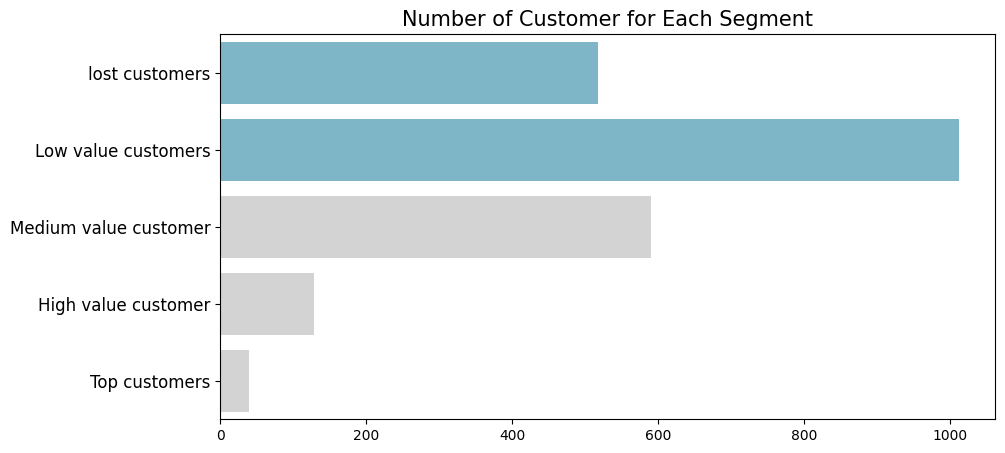

In [119]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [122]:
# RFM score
data_rfm["recency_score"] = pd.qcut(data_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
data_rfm["frequency_score"] = pd.qcut(data_rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])


# segment naming
data_rfm['rfm_segment'] = data_rfm['recency_score'].astype(str) + data_rfm['frequency_score'].astype(str)

seg_map = {
  r'[1-2][1-2]': 'hibernating',
  r'[1-2][3-4]': 'at_risk',
  r'[1-2]5': 'cant_loose',
  r'3[1-2]': 'about_to_sleep',
  r'33': 'need_attention',
  r'[3-4][4-5]': 'loyal_customers',
  r'41': 'promising',
  r'51': 'new_customers',
  r'[4-5][2-3]': 'potential_loyalists',
  r'5[4-5]': 'champions'
}
data_rfm['rfm_segment'] = data_rfm['rfm_segment'].replace(seg_map, regex=True)

In [123]:
data_rfm.head()

,customer_id,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm,recency_score,frequency_score,RFM_score,customer_segment,rfm_segment
12,00066ccbe787a588c52bd5ff404590e3,209,4,199.60,53.26,68.87,53.56,3,3,2.89,Low value customers,need_attention
77,00331de1659c7f4fb660c8810e6de3f5,259,3,207.00,44.32,28.92,55.36,3,1,2.31,Low value customers,about_to_sleep
100,00426311a53f3c052943c88b692a3be2,264,6,177.00,43.66,93.16,47.55,3,5,2.99,Low value customers,loyal_customers
182,00796be07bfc87dad2e31ef15490a718,298,3,89.97,32.60,28.92,17.97,2,1,1.16,lost customers,hibernating
233,009ac0aeacb7e5c368452976385b7903,353,3,539.70,22.82,28.92,86.55,2,1,3.04,Medium value customer,hibernating


In [127]:
rfm_kaggle=data_rfm.groupby("rfm_segment", as_index=False).agg({
    "customer_id" : "count"
})

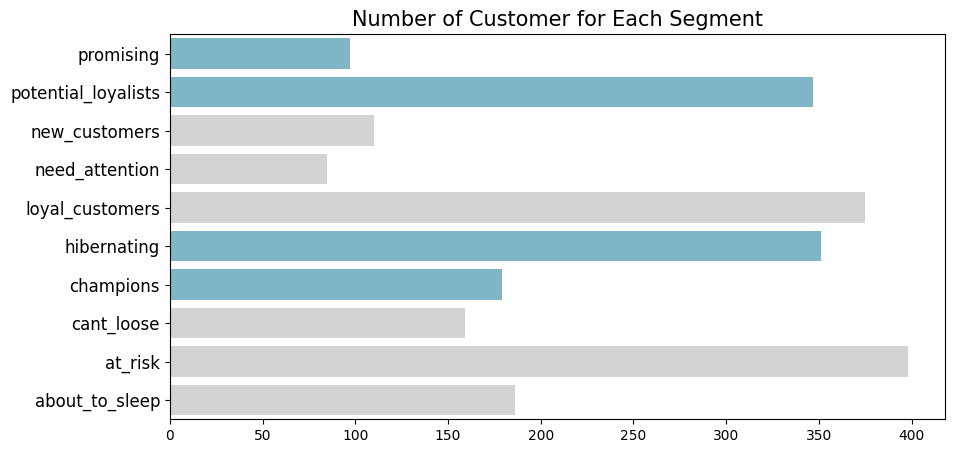

In [128]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="rfm_segment",
    data=rfm_kaggle.sort_values(by="rfm_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()